In [1]:
import pandas as pd
import numpy as np
df = pd.read_csv(r'G:\机器学习资料\菜菜的skleran\04主成分分析PCA与奇异值分解SVD\digit recognizor.csv')

In [2]:
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA

In [3]:
data = load_iris()
y = data.target
x= data.data
x.shape

(150, 4)

In [4]:
data.target


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [5]:
pca = PCA(n_components=2)
pca = pca.fit(x)
x_dr = pca.transform(x)
x_dr


array([[-2.68412563,  0.31939725],
       [-2.71414169, -0.17700123],
       [-2.88899057, -0.14494943],
       [-2.74534286, -0.31829898],
       [-2.72871654,  0.32675451],
       [-2.28085963,  0.74133045],
       [-2.82053775, -0.08946138],
       [-2.62614497,  0.16338496],
       [-2.88638273, -0.57831175],
       [-2.6727558 , -0.11377425],
       [-2.50694709,  0.6450689 ],
       [-2.61275523,  0.01472994],
       [-2.78610927, -0.235112  ],
       [-3.22380374, -0.51139459],
       [-2.64475039,  1.17876464],
       [-2.38603903,  1.33806233],
       [-2.62352788,  0.81067951],
       [-2.64829671,  0.31184914],
       [-2.19982032,  0.87283904],
       [-2.5879864 ,  0.51356031],
       [-2.31025622,  0.39134594],
       [-2.54370523,  0.43299606],
       [-3.21593942,  0.13346807],
       [-2.30273318,  0.09870885],
       [-2.35575405, -0.03728186],
       [-2.50666891, -0.14601688],
       [-2.46882007,  0.13095149],
       [-2.56231991,  0.36771886],
       [-2.63953472,

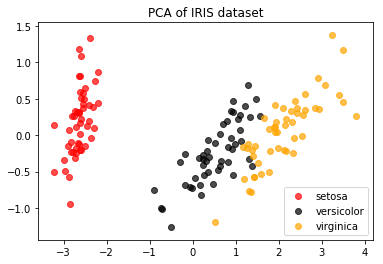

In [6]:
colors = ['red', 'black', 'orange']
data.target_names
plt.figure()
for i in [0, 1, 2]:
    plt.scatter(x_dr[y == i, 0],
                x_dr[y==i,1]
               ,alpha=.7
               ,c=colors[i]
               ,label=data.target_names[i]
               )
plt.legend()
plt.title('PCA of IRIS dataset')
plt.show()


In [7]:
pca.explained_variance_
pca_line.explained_variance_ratio_

NameError: name 'pca_line' is not defined

[0.92461872 0.97768521 0.99478782 1.        ]


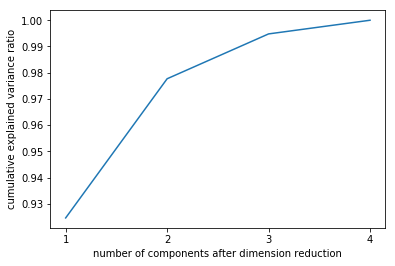

4

In [8]:
import numpy as np
pca_line = PCA().fit(x)
print(np.cumsum(pca_line.explained_variance_ratio_))
plt.plot([1,2,3,4],np.cumsum(pca_line.explained_variance_ratio_))
plt.xticks([1,2,3,4])
plt.xlabel("number of components after dimension reduction")
plt.ylabel("cumulative explained variance ratio")
plt.show()
min(x.shape)

In [11]:
pca_mle = PCA(n_components='mle')
pca_mle = pca_mle.fit(x)
x_mle = pca_mle.transform(x)
pca_mle

PCA(copy=True, iterated_power='auto', n_components='mle', random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [12]:
pca_mle.explained_variance_ratio_

array([0.92461872, 0.05306648, 0.01710261])

In [13]:
pca_f = PCA(n_components=0.97,svd_solver='full')
pca_f = pca_f.fit(x)
x_f = pca_f.transform(x) 

In [14]:
pca_f.explained_variance_ratio_

array([0.92461872, 0.05306648])

In [15]:
pca_f.components_

array([[ 0.36138659, -0.08452251,  0.85667061,  0.3582892 ],
       [ 0.65658877,  0.73016143, -0.17337266, -0.07548102]])

In [24]:
pca_f.components_.shape

(2, 4)

In [16]:
from sklearn.datasets import fetch_lfw_people
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [17]:
faces = fetch_lfw_people(min_faces_per_person=60)
faces.images.shape
#怎样理解这个数据的维度？
faces.data.shape
#换成特征矩阵之后，这个矩阵是什么样？
X = faces.data

In [19]:
X.shape

(1348, 2914)

In [20]:
faces.images.shape

(1348, 62, 47)

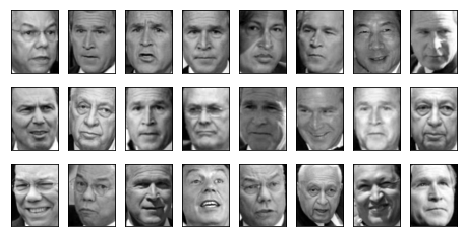

In [58]:
fig,axes = plt.subplots(3,8,
                      figsize=(8,4),
                      subplot_kw={'xticks':[],'yticks':[]},
                       )
for i, ax in enumerate(axes.flat):
    ax.imshow(faces.images[i,:,:]
             ,cmap="gray", #选择色彩的模式

             )

In [59]:
pca = PCA(150).fit(X)
x_dr = pca.transform(X)

In [73]:
print(x_dr.shape)
X.shape

(1348, 150)


(1348, 2914)

In [61]:
v = pca.components_
v.shape

(150, 2914)

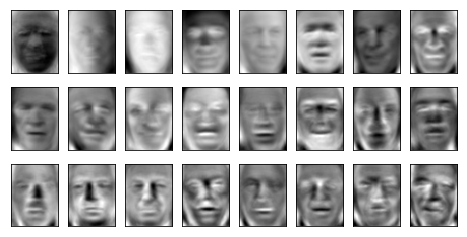

In [71]:
fig,axes = plt.subplots(3,8,
                      figsize=(8,4),
                      subplot_kw={'xticks':[],'yticks':[]},
                       )
for i, ax in enumerate(axes.flat):
    ax.imshow(v[i,:].reshape(62,47)
             ,cmap="gray", #选择色彩的模式

             )

In [74]:
x_dr.shape

(1348, 150)

In [75]:
x_inverse  = pca.inverse_transform(x_dr)

In [76]:
x_inverse.shape

(1348, 2914)

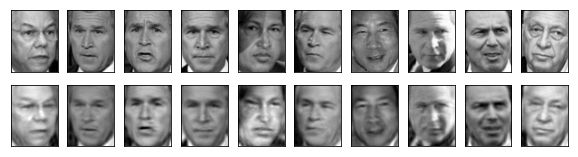

In [80]:
fig, ax = plt.subplots(2,10,figsize=(10,2.5)
                     ,subplot_kw={"xticks":[],"yticks":[]}
                     )
#和2.3.3节中的案例一样，我们需要对子图对象进行遍历的循环，来将图像填入子图中
#那在这里，我们使用怎样的循环？
#现在我们的ax中是2行10列，第一行是原数据，第二行是inverse_transform后返回的数据
#所以我们需要同时循环两份数据，即一次循环画一列上的两张图，而不是把ax拉平
for i in range(10):
    ax[0,i].imshow(faces.images[i,:,:],cmap="binary_r")
    ax[1,i].imshow(x_inverse[i].reshape(62,47),cmap="binary_r")


In [81]:
from sklearn.datasets import load_digits
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np


In [83]:
digits = load_digits()
data = digits.data
digits.data.shape

(1797, 64)

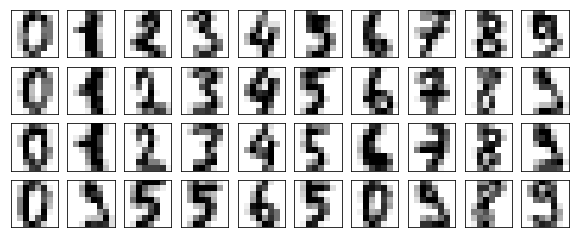

In [85]:
def plot_digits(data):
    fig,axes = plt.subplots(4,10,
                           figsize=(10,4),
                           subplot_kw={"xticks":[],"yticks":[]})
    for i, ax in enumerate(axes.flat):
        ax.imshow(data[i].reshape(8,8),cmap='binary')
plot_digits(data)

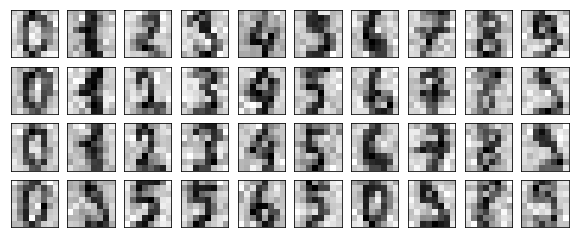

In [90]:
rng = np.random.RandomState(42)
noisy = rng.normal(digits.data,2)
plot_digits(noisy)

In [111]:
pca = PCA(0.5,svd_solver='full').fit(noisy)
com = pca.components_
print(com.shape)
X_dr = pca.transform(noisy)
pca.get_params()



(6, 64)


{'copy': True,
 'iterated_power': 'auto',
 'n_components': 0.5,
 'random_state': None,
 'svd_solver': 'full',
 'tol': 0.0,
 'whiten': False}

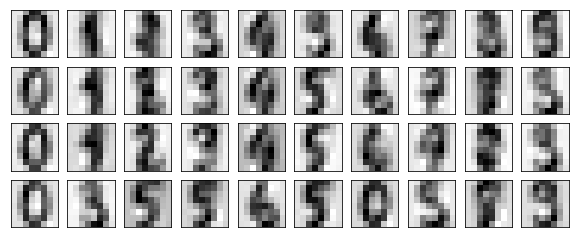

In [88]:
without_noise = pca.inverse_transform(X_dr)
plot_digits(without_noise)

In [112]:
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier as RFC
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
df = pd.read_csv(r'G:\机器学习资料\菜菜的skleran\04主成分分析PCA与奇异值分解SVD\digit recognizor.csv')

In [113]:
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [115]:
x=df.iloc[:,1:]
y=df.iloc[:,0]

In [117]:
pca_line = PCA().fit(x)

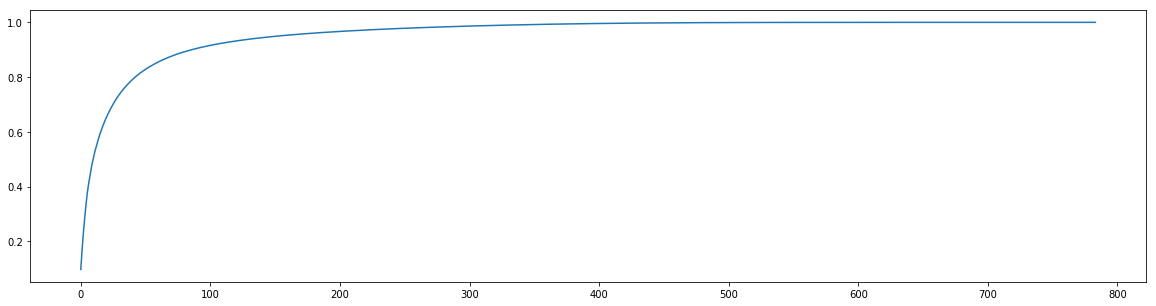

In [118]:
plt.figure(figsize=[20,5])
plt.plot(np.cumsum(pca_line.explained_variance_ratio_))

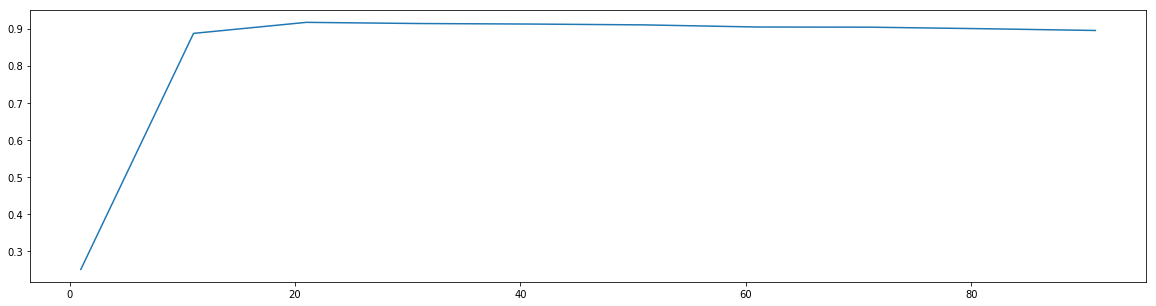

In [120]:
score = []
for i in range(1,101,10):
    X_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10,random_state=0)
                           ,X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(1,101,10),score)
plt.show()


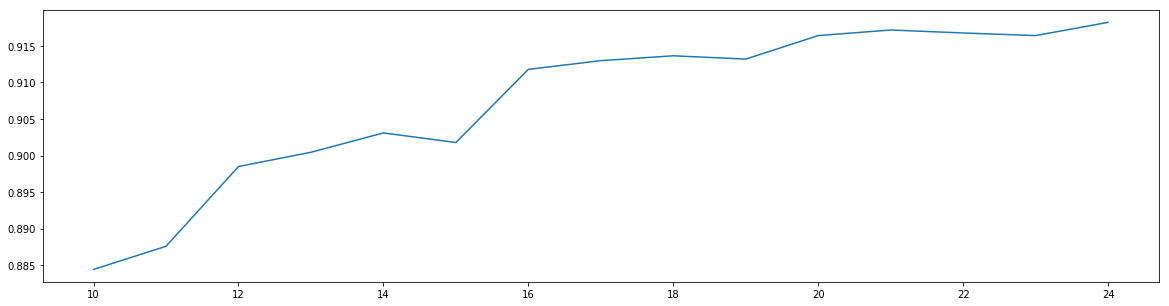

In [123]:
score = []
for i in range(10,25):
    X_dr = PCA(i).fit_transform(x)
    once = cross_val_score(RFC(n_estimators=10,random_state=0),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10,25),score)

In [134]:
X_dr = PCA(23).fit_transform(x)
cross_val_score(RFC(n_estimators=100,random_state=0),X_dr,y,cv=5).mean()
X_dr.shape

(42000, 23)

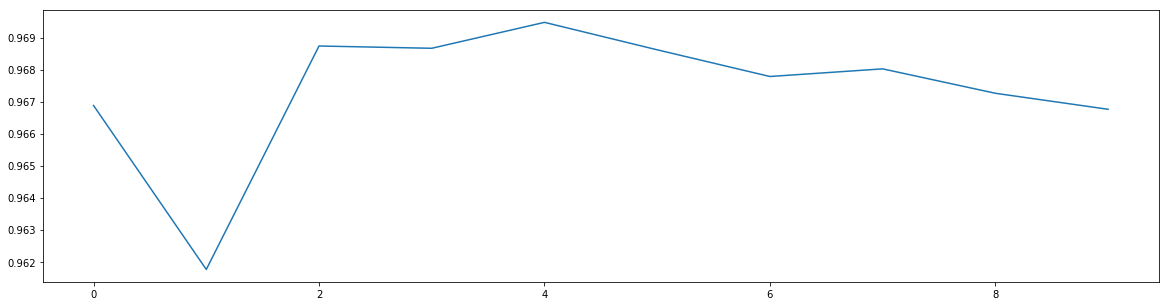

In [138]:
# from sklearn.neighbors import KNeighborsClassifier as KNN
# cross_val_score(KNN(),X_dr,y,cv=5).mean()
# X_dr.shape
#======【TIME WARNING: 】======#
score = []
X_dr = PCA(23).fit_transform(x)
X_dr.shape
for i in range(10):
    once = cross_val_score(KNN(i+1),X_dr,y,cv=5).mean()
    score.append(once)
plt.figure(figsize=[20,5])
plt.plot(range(10),score)
plt.show()